In [1]:
import numpy as np
import pandas as pd

In [2]:
advertising = pd.read_csv("Company_data.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


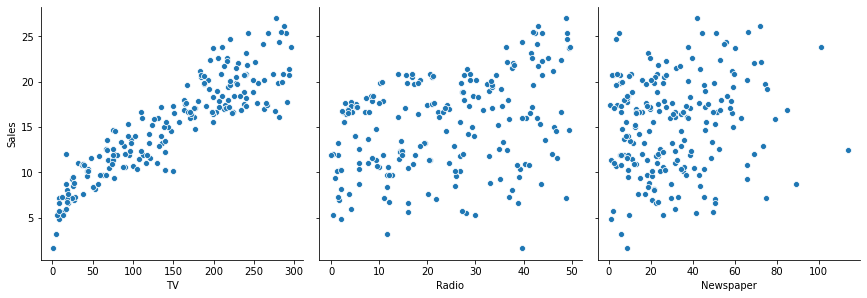

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(advertising, x_vars=['TV', 'Radio','Newspaper'], 
             y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

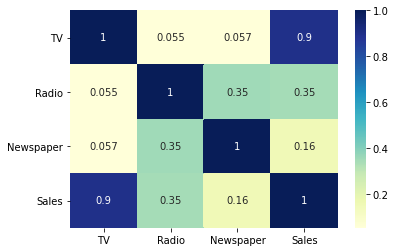

In [7]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [8]:
X = advertising['TV']
y = advertising['Sales']

In [10]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)


In [11]:

# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(140, 1)
(60, 1)


In [27]:
print(X_train_lm)

[[213.4]
 [151.5]
 [205. ]
 [142.9]
 [134.3]
 [ 80.2]
 [239.8]
 [ 88.3]
 [ 19.4]
 [225.8]
 [136.2]
 [ 25.1]
 [ 38. ]
 [172.5]
 [109.8]
 [240.1]
 [232.1]
 [ 66.1]
 [218.4]
 [234.5]
 [ 23.8]
 [ 67.8]
 [296.4]
 [141.3]
 [175.1]
 [220.5]
 [ 76.4]
 [253.8]
 [191.1]
 [287.6]
 [100.4]
 [228. ]
 [125.7]
 [ 74.7]
 [ 57.5]
 [262.7]
 [262.9]
 [237.4]
 [227.2]
 [199.8]
 [228.3]
 [290.7]
 [276.9]
 [199.8]
 [239.3]
 [ 73.4]
 [284.3]
 [147.3]
 [224. ]
 [198.9]
 [276.7]
 [ 13.2]
 [ 11.7]
 [280.2]
 [ 39.5]
 [265.6]
 [ 27.5]
 [280.7]
 [ 78.2]
 [163.3]
 [213.5]
 [293.6]
 [ 18.7]
 [ 75.5]
 [166.8]
 [ 44.7]
 [109.8]
 [  8.7]
 [266.9]
 [206.9]
 [149.8]
 [ 19.6]
 [ 36.9]
 [199.1]
 [265.2]
 [165.6]
 [140.3]
 [230.1]
 [  5.4]
 [ 17.9]
 [237.4]
 [286. ]
 [ 93.9]
 [292.9]
 [ 25. ]
 [ 97.5]
 [ 26.8]
 [281.4]
 [ 69.2]
 [ 43.1]
 [255.4]
 [239.9]
 [209.6]
 [  7.3]
 [240.1]
 [102.7]
 [243.2]
 [137.9]
 [ 18.8]
 [ 17.2]
 [ 76.4]
 [139.5]
 [261.3]
 [ 66.9]
 [ 48.3]
 [177. ]
 [ 28.6]
 [180.8]
 [222.4]
 [193.7]
 [ 59.6]
 

In [12]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [13]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 6.948683200001357
Slope : [0.05454575]


In [15]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)


In [16]:
print(y_train_pred)

[18.58874687 15.21236477 18.13056255 14.74327129 14.27417782 11.32325258
 20.02875475 11.76507318  8.00687081 19.26511421 14.37781475  8.3177816
  9.02142181 16.35782558 12.93780687 20.04511848 19.60875245 10.55415747
 18.86147564 19.73966226  8.24687212 10.64688525 23.11604436 14.65599809
 16.49964454 18.97602172 11.11597872 20.79239529 17.37237658 22.63604174
 12.42507679 19.38511486 13.80508434 11.02325094 10.08506399 21.27785249
 21.28876164 19.89784494 19.34147826 17.84692463 19.40147859 22.80513357
 22.05240218 17.84692463 20.00148187 10.95234146 22.45604075 14.9832726
 19.16693185 17.79783345 22.04149303  7.66868714  7.58686851 22.23240317
  9.10324044 21.43603517  8.44869141 22.25967604 11.21416108 15.85600465
 18.59420145 22.96331626  7.96868878 11.06688755 16.04691479  9.38687836
 12.93780687  7.42323125 21.50694465 18.23419948 15.11963699  8.01777996
  8.96142148 17.80874261 21.41421687 15.98145988 14.60145233 19.49966095
  7.24323027  7.92505218 19.89784494 22.54876853 12.0

In [17]:
print(y_test_pred)

[ 7.37414007 19.94148154 14.32326899 18.82329361 20.13239168 18.2287449
 14.54145201 17.72692398 18.75238413 18.77420243 13.34144544 19.46693349
 10.01415451 17.1923756  11.70507285 12.08689312 15.11418241 16.23237035
 15.8669138  13.1068987  18.65965635 14.00690363 17.60692332 16.60328147
 17.03419291 18.96511257 18.93783969 11.05597839 17.03419291 13.66326538
 10.6796127  10.71234015 13.5487193  17.22510305  9.67597085 13.52144643
 12.25053038 16.13418799 19.07965865 17.48692266 18.69783838 16.53237199
 15.92145955 18.86693021 13.5050827  11.84143724  7.87050642 20.51966653
 10.79961336  9.03233096 17.99419817 16.29237067 11.04506924 14.09963141
 18.44147334  9.3759692   7.88687015  8.34505447 17.72692398 11.62325422]


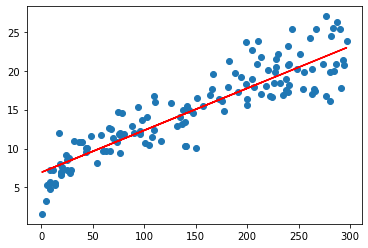

In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.scatter(X_train_lm, y_train_lm)
plt.plot(X_train_lm, 6.948 + 0.054*X_train_lm, 'r')
plt.show()

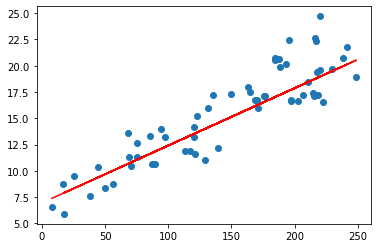

In [23]:
plt.scatter(X_test_lm, y_test_lm)
plt.plot(X_test_lm, y_test_pred, 'r')
plt.show()

In [29]:
y_f = lm.predict([[200]])
print(y_f)

[17.85783378]
